In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
missing = df.isnull().sum()
print(missing)

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [4]:
#now filling the positon with fillna
df.fillna(0, inplace = True)
missing = df.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [5]:
x = df.iloc[:, [5, 6]].values
print(x.shape)
print(x)
print(df.shape)

(12330, 2)
[[ 0.0000000e+00  2.0000000e-01]
 [ 6.4000000e+01  0.0000000e+00]
 [-1.0000000e+00  2.0000000e-01]
 ...
 [ 1.8425000e+02  8.3333333e-02]
 [ 3.4600000e+02  0.0000000e+00]
 [ 2.1250000e+01  0.0000000e+00]]
(12330, 18)


[0 0 0 ... 0 0 0]
45152288642.74862
[0 0 0 ... 0 0 0]
20933832770.82134
[0 0 0 ... 0 0 0]
12620145085.109606
[1 1 1 ... 1 1 1]
8308834716.853316
[1 1 1 ... 1 1 1]
5464701778.3926
[0 0 0 ... 0 0 0]
3851044980.4809346
[0 0 0 ... 0 0 0]
2772667538.450636
[3 3 3 ... 3 3 3]
2077585150.9444885
[0 0 0 ... 0 0 0]
1591501911.0368001
[0 0 0 ... 0 0 0]
1276887955.9640336


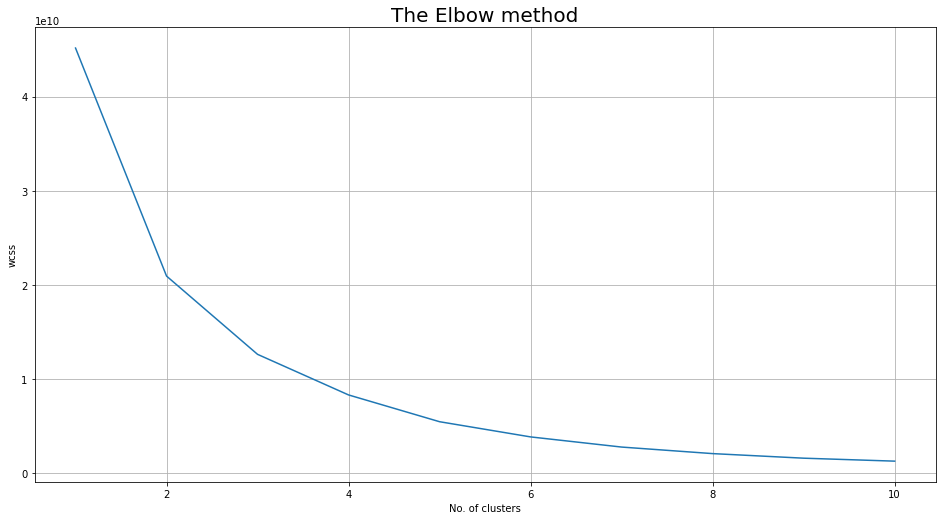

In [6]:
import matplotlib
wcss = []
for i in range(1, 11):
    km = KMeans(
        n_clusters = i,
        init = 'k-means++',
        n_init = 10,
        random_state = 0,
        algorithm = 'full',
        tol = 0.001
    )
    km.fit(x)
    labels = km.labels_
    print(labels)
    wcss.append(km.inertia_)
    print(km.inertia_)

plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow method', fontsize = 20)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
plt.show()    

In [7]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1234)
y_means = km.fit_predict(x)

In [8]:
arr = [1, 2, 3, 2, 1, 4, 3]
ndarray = np.array(arr)
data = [ndarray == 1, 0]
print(data)

[array([ True, False, False, False,  True, False, False]), 0]


In [9]:
np.unique(y_means)

array([0, 1])

In [10]:
km.cluster_centers_

array([[7.94598061e+02, 2.33983464e-02],
       [6.10460699e+03, 6.52871228e-03]])

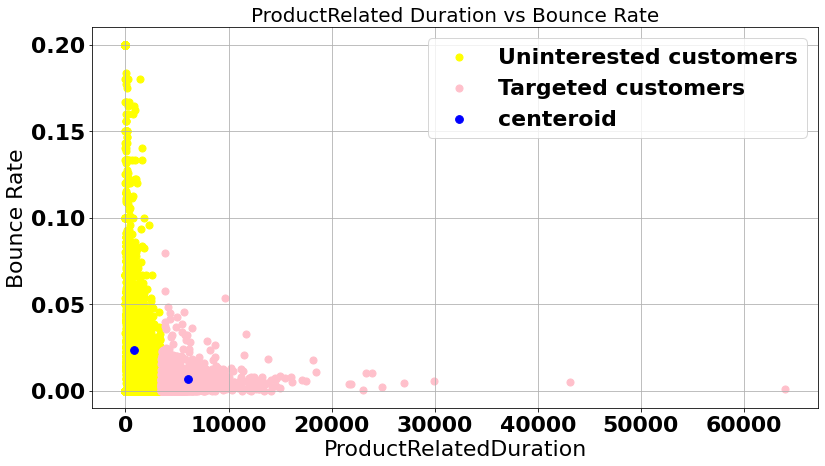

In [11]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow', label = 'Uninterested customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'pink', label = 'Targeted customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 60, c = 'blue', label = 'centeroid')
plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelatedDuration')
plt.ylabel('Bounce Rate')
plt.legend()
plt.show()

Adjusted rand index : 
0.08359442469281096


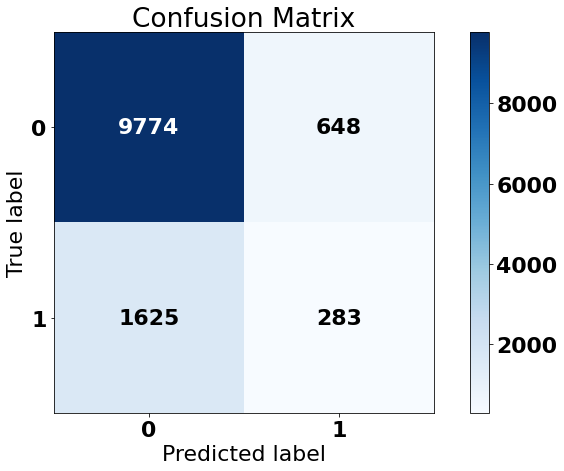

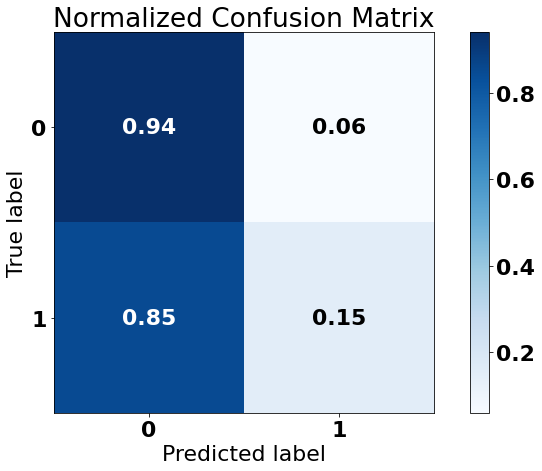

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(df['Revenue'])
labels_pred = y_means

from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print('Adjusted rand index : ')
print(score)

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize = False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize = True)